# Housing Rental Analysis for San Francisco

In this challenge, your job is to use your data visualization superpowers, including aggregation, interactive visualizations, and geospatial analysis, to find properties in the San Francisco market that are viable investment opportunities.

Instructions:

Use the `san_francisco_housing.ipynb` notebook to visualize and analyze the real-estate data.

Note that this assignment requires you to create a visualization by using the integration between Plotly and the Mapbox API. Be sure to create your environment file (`.env`) and include your Mapbox API access token. Then import your Mapbox API access token into the `san_francisco_housing.ipynb` notebook, and set it by using the `px.set_mapbox_access_token` function.

Additionally, you need to read the `sfo_neighborhoods_census_data.csv` file from the `Resources` folder into the notebook and create the DataFrame that you’ll use in the analysis.

The main task in this Challenge is to visualize and analyze the real-estate data in your Jupyter notebook. Use the `san_francisco_housing.ipynb` notebook to complete the following tasks:

* Calculate and plot the housing units per year.

* Calculate and plot the average prices per square foot.

* Compare the average prices by neighborhood.

* Build an interactive neighborhood map.

* Compose your data story.

##### Calculate and Plot the Housing Units per Year

For this part of the assignment, use numerical and visual aggregation to calculate the number of housing units per year, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

2. Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

3. Style and format the line plot to ensure a professionally styled visualization.

4. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting bar chart.](Images/zoomed-housing-units-by-year.png)

5. Answer the following question:

    * What’s the overall trend in housing units over the period that you’re analyzing?

##### Calculate and Plot the Average Sale Prices per Square Foot

For this part of the assignment, use numerical and visual aggregation to calculate the average prices per square foot, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Group the data by year, and then average the results. What’s the lowest gross rent that’s reported for the years that the DataFrame includes?

2. Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

3. Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

    > **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/avg-sale-px-sq-foot-gross-rent.png)

6. Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

    * Did any year experience a drop in the average sale price per square foot compared to the previous year?

    * If so, did the gross rent increase or decrease during that year?

##### Compare the Average Sale Prices by Neighborhood

For this part of the assignment, use interactive visualizations and widgets to explore the average sale price per square foot by neighborhood. To do so, complete the following steps:

1. Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

2. Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

3. Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/pricing-info-by-neighborhood.png)

6. Use the interactive visualization to answer the following question:

    * For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 

##### Build an Interactive Neighborhood Map

For this part of the assignment, explore the geospatial relationships in the data by using interactive visualizations with Plotly and the Mapbox API. To build your map, use the `sfo_data_df` DataFrame (created during the initial import), which includes the neighborhood location data with the average prices. To do all this, complete the following steps:

1. Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

2. Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

3. Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. The second cell cleans the data and sets the “Neighborhood” column. Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

4. Using Plotly Express, create a `scatter_mapbox` for the `all_neighborhoods_df` DataFrame. Remember that you need your MapBox API key. Be sure to do the following:

    * Set the `size` parameter to “sale_price_sqr_foot”.

    * Set the `color` parameter to “gross_rent”.

    * Set the `size_max` parameter to “25”.

    * Set the `zoom` parameter to “11”.

5. Style and format the line plot to ensure a professionally styled visualization.

6. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of a scatter plot created with the Mapbox API.](Images/mapbox-plot.png)

7. Use the interactive map to answer the following question:

    * Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?

##### Compose Your Data Story

Based on the visualizations that you created, answer the following questions:

* How does the trend in rental income growth compare to the trend in sales prices? Does this same trend hold true for all the neighborhoods across San Francisco?

* What insights can you share with your company about the potential one-click, buy-and-rent strategy that they're pursuing? Do neighborhoods exist that you would suggest for investment, and why?

In [1]:
# Import the required libraries and dependencies
import os
import pandas as pd
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
from pathlib import Path
from dotenv import load_dotenv

## Enable your Mapbox API access token

In [2]:
# Load the .env file into the notebook
load_dotenv()

# Read in your MAPBOX_API_KEY
mapbox_api_access_token = os.getenv("MAPBOX_API")

# Confirm the availability of your Mapbox API access token by checking its type
type(mapbox_api_access_token)

# Set your Mapbox API access token
px.set_mapbox_access_token(mapbox_api_access_token)


## Import the data 

In [3]:
# Using the read_csv function and Path module, create a DataFrame 
# by importing the sfo_neighborhoods_census_data.csv file from the Resources folder
sfo_data_df = pd.read_csv(Path("./Resources/sfo_neighborhoods_census_data.csv"))
#, index_col = "Neighborhood"

# Below renames the columns
columns=['Year', 'Neighborhood', 'Sale Price per Square Foot','Housing Units','Gross Rent']
sfo_data_df.columns=columns

# Review the first and last five rows of the DataFrame
display(sfo_data_df.head())
display(sfo_data_df.tail())


Year      Neighborhood  Sale Price per Square Foot  Housing Units  \
0  2010      Alamo Square                  291.182945         372560   
1  2010        Anza Vista                  267.932583         372560   
2  2010           Bayview                  170.098665         372560   
3  2010  Buena Vista Park                  347.394919         372560   
4  2010  Central Richmond                  319.027623         372560   

   Gross Rent  
0        1239  
1        1239  
2        1239  
3        1239  
4        1239

Year            Neighborhood  Sale Price per Square Foot  Housing Units  \
392  2016          Telegraph Hill                  903.049771         384242   
393  2016              Twin Peaks                  970.085470         384242   
394  2016  Van Ness/ Civic Center                  552.602567         384242   
395  2016       Visitacion Valley                  328.319007         384242   
396  2016           Westwood Park                  631.195426         384242   

     Gross Rent  
392        4390  
393        4390  
394        4390  
395        4390  
396        4390

---

## Calculate and Plot the Housing Units per Year

For this part of the assignment, use numerical and visual aggregation to calculate the number of housing units per year, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

2. Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

3. Style and format the line plot to ensure a professionally styled visualization.

4. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting bar chart.](Images/zoomed-housing-units-by-year.png)

5. Answer the following question:

    * What’s the overall trend in housing units over the period that you’re analyzing?



### Step 1: Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

In [4]:
# Create a numerical aggregation that groups the data by the year and then averages the results.
housing_units_by_year = sfo_data_df.groupby("Year").mean()

# Review the DataFrame
housing_units_by_year


Sale Price per Square Foot  Housing Units  Gross Rent
Year                                                       
2010                  369.344353         372560        1239
2011                  341.903429         374507        1530
2012                  399.389968         376454        2324
2013                  483.600304         378401        2971
2014                  556.277273         380348        3528
2015                  632.540352         382295        3739
2016                  697.643709         384242        4390

### Step 2: Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

### Step 3: Style and format the line plot to ensure a professionally styled visualization.

In [5]:
# Create a visual aggregation explore the housing units by year
housing_units_by_year_plot = housing_units_by_year.hvplot.bar(
x="Year",
y="Housing Units",
xlabel= "Year",
ylabel="Average Housing Units",
title= "SFO (2010-2016) Housing Units",
color= "green",
hover_color= "black",
ylim=(365000, 385000)).opts(
yformatter='%.0f'
)

# Below will generate the plot
housing_units_by_year_plot


:Bars   [Year]   (Housing Units)

### Step 5: Answer the following question:

**Question** What is the overall trend in housing_units over the period being analyzed?

**Answer** # YOUR ANSWER HERE 

---

## Calculate and Plot the Average Sale Prices per Square Foot

For this part of the assignment, use numerical and visual aggregation to calculate the average prices per square foot, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Group the data by year, and then average the results. What’s the lowest gross rent that’s reported for the years that the DataFrame includes?

2. Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

3. Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

    > **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/avg-sale-px-sq-foot-gross-rent.png)

6. Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

    * Did any year experience a drop in the average sale price per square foot compared to the previous year?

    * If so, did the gross rent increase or decrease during that year?



### Step 1: Group the data by year, and then average the results.

In [6]:
# Create a numerical aggregation by grouping the data by year and averaging the results
prices_square_foot_by_year = sfo_data_df.groupby("Year").mean()

# Review the resulting DataFrame
prices_square_foot_by_year


Sale Price per Square Foot  Housing Units  Gross Rent
Year                                                       
2010                  369.344353         372560        1239
2011                  341.903429         374507        1530
2012                  399.389968         376454        2324
2013                  483.600304         378401        2971
2014                  556.277273         380348        3528
2015                  632.540352         382295        3739
2016                  697.643709         384242        4390

**Question** What is the lowest gross rent reported for the years included in the DataFrame?

**Answer** # YOUR ANSWER HERE

### Step 2: Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

In [7]:
# Filter out the housing_units column, creating a new DataFrame 
# Keep only sale_price_sqr_foot and gross_rent averages per year
prices_square_foot_by_year = prices_square_foot_by_year[["Sale Price per Square Foot","Gross Rent"]]

# Review the DataFrame
prices_square_foot_by_year


Sale Price per Square Foot  Gross Rent
Year                                        
2010                  369.344353        1239
2011                  341.903429        1530
2012                  399.389968        2324
2013                  483.600304        2971
2014                  556.277273        3528
2015                  632.540352        3739
2016                  697.643709        4390

### Step 3: Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

> **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`

### Step 4: Style and format the line plot to ensure a professionally styled visualization.


In [8]:
# Plot prices_square_foot_by_year. 
# Inclued labels for the x- and y-axes, and a title.
prices_square_foot_by_year_plot = prices_square_foot_by_year.hvplot(
    title= "SFO (2010-2016) Avg. Sale Price per Square Foot vs Avg. Gross Rent",
    xlabel= "Year",
    ylabel= "Gross Rent/ Sale Price Per Square Foot",
    group_label = "Legend:"
).opts(yformatter='%.0f')

# Below will generate the plot
prices_square_foot_by_year_plot

:NdOverlay   [Legend:]
   :Curve   [Year]   (value)

In [9]:
# Checking % change 
yoy_percent_change_sqrft_rent = prices_square_foot_by_year.pct_change().dropna()
yoy_percent_change_sqrft_rent

Sale Price per Square Foot  Gross Rent
Year                                        
2011                   -0.074296    0.234867
2012                    0.168137    0.518954
2013                    0.210847    0.278399
2014                    0.150283    0.187479
2015                    0.137095    0.059807
2016                    0.102924    0.174111

In [10]:
yoy_percent_change_sqrft_rent_plot = yoy_percent_change_sqrft_rent.hvplot(
title= "SFO (2010-2016) YOY % Change of the Sale Price per Square Foot and Avg. Rent",
xlabel= "Year",
ylabel= "Gross Rent/ Sale Price Per Square Foot",
group_label = "Legend:"
)

yoy_percent_change_sqrft_rent_plot

:NdOverlay   [Legend:]
   :Curve   [Year]   (value)

### Step 6: Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

**Question** * Did any year experience a drop in the average sale price per square foot compared to the previous year?

**Answer** Per plot "SFO (2010-2016) Sale Price per Square Foot vs Avg. Gross Rent" there appears to be an average slight drop (~7%) in 2011.

**Question** * If so, did the gross rent increase or decrease during that year?I

**Answer** Per plot  Per plot "SFO (2010-2016) Sale Price per Square Foot vs Avg. Gross Rent" the gross rent continued to increased.

---

## Compare the Average Sale Prices by Neighborhood

For this part of the assignment, use interactive visualizations and widgets to explore the average sale price per square foot by neighborhood. To do so, complete the following steps:

1. Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

2. Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

3. Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/pricing-info-by-neighborhood.png)

6. Use the interactive visualization to answer the following question:

    * For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 


### Step 1: Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

In [202]:
# Group by year and neighborhood and then create a new dataframe of the mean values
prices_by_year_by_neighborhood = sfo_data_df.groupby(["Year","Neighborhood"]).mean()

# Review the DataFrame
prices_by_year_by_neighborhood


Sale Price per Square Foot  Housing Units  \
Year Neighborhood                                                        
2010 Alamo Square                            291.182945         372560   
     Anza Vista                              267.932583         372560   
     Bayview                                 170.098665         372560   
     Buena Vista Park                        347.394919         372560   
     Central Richmond                        319.027623         372560   
...                                                 ...            ...   
2016 Telegraph Hill                          903.049771         384242   
     Twin Peaks                              970.085470         384242   
     Van Ness/ Civic Center                  552.602567         384242   
     Visitacion Valley                       328.319007         384242   
     Westwood Park                           631.195426         384242   

                             Gross Rent  
Year Neighborhood                        
2010 Alamo Square                  1239  
     Anza Vista                    1239  
     Bayview                       1239  
     Buena Vista Park              1239  
     Central Richmond              1239  
...                                 ...  
2016 Telegraph Hill                4390  
     Twin Peaks                    4390  
     Van Ness/ Civic Center        4390  
     Visitacion Valley             4390  
     Westwood Park                 4390  

[397 rows x 3 columns]

### Step 2: Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

In [203]:
# Filter out the housing_units
prices_by_year_by_neighborhood = prices_by_year_by_neighborhood[["Sale Price per Square Foot","Gross Rent"]]

# Review the first and last five rows of the DataFrame
display(prices_by_year_by_neighborhood.head())
display(prices_by_year_by_neighborhood.tail())


Sale Price per Square Foot  Gross Rent
Year Neighborhood                                            
2010 Alamo Square                      291.182945        1239
     Anza Vista                        267.932583        1239
     Bayview                           170.098665        1239
     Buena Vista Park                  347.394919        1239
     Central Richmond                  319.027623        1239

Sale Price per Square Foot  Gross Rent
Year Neighborhood                                                  
2016 Telegraph Hill                          903.049771        4390
     Twin Peaks                              970.085470        4390
     Van Ness/ Civic Center                  552.602567        4390
     Visitacion Valley                       328.319007        4390
     Westwood Park                           631.195426        4390

### Step 3: Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

### Step 4: Style and format the line plot to ensure a professionally styled visualization.

In [221]:
# Use hvplot to create an interactive line plot of the average price per square foot
# The plot should have a dropdown selector for the neighborhood

prices_by_year_by_neighborhood_plot = prices_by_year_by_neighborhood.hvplot(
x="Year",
groupby="Neighborhood",
title=" SFO Neighborhoods (2010-2016) Avg. Sale Price Per Sqft. vs. Avg. Gross Rent ",
ylabel= "Gross Rent/ Sale Price Per Square Foot",
group_label="Legend:"
)
# This will generate the result of that plot syntax.
# Please note there are missing data points so not all Neighborhoods will display both the Avg. Sale Price and or Gross Rent
prices_by_year_by_neighborhood_plot



:DynamicMap   [Neighborhood]
   :NdOverlay   [Legend:]
      :Curve   [Year]   (value)

### Step 6: Use the interactive visualization to answer the following question:

**Question** For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 

**Answer**  The average sale price per square foot is lower in 2016 than it was in 2012.

---

## Build an Interactive Neighborhood Map

For this part of the assignment, explore the geospatial relationships in the data by using interactive visualizations with Plotly and the Mapbox API. To build your map, use the `sfo_data_df` DataFrame (created during the initial import), which includes the neighborhood location data with the average prices. To do all this, complete the following steps:

1. Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

2. Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

3. Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. The second cell cleans the data and sets the “Neighborhood” column. Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

4. Using Plotly Express, create a `scatter_mapbox` for the `all_neighborhoods_df` DataFrame. Remember that you need your MapBox API key. Be sure to do the following:

    * Set the `size` parameter to “sale_price_sqr_foot”.

    * Set the `color` parameter to “gross_rent”.

    * Set the `size_max` parameter to “25”.

    * Set the `zoom` parameter to “11”.

5. Style and format the line plot to ensure a professionally styled visualization.

6. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of a scatter plot created with the Mapbox API.](Images/mapbox-plot.png)

7. Use the interactive map to answer the following question:

    * Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?



### Step 1: Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

In [14]:
# Load neighborhoods coordinates data
neighborhood_locations_df = pd.read_csv(Path("./Resources/neighborhoods_coordinates.csv",))
#, index_col = "Neighborhood"
# Review the DataFrame
neighborhood_locations_df


Neighborhood        Lat         Lon
0         Alamo Square  37.791012 -122.402100
1           Anza Vista  37.779598 -122.443451
2              Bayview  37.734670 -122.401060
3      Bayview Heights  37.728740 -122.410980
4       Bernal Heights  37.728630 -122.443050
..                 ...        ...         ...
68         West Portal  37.740260 -122.463880
69    Western Addition  37.792980 -122.435790
70  Westwood Highlands  37.734700 -122.456854
71       Westwood Park  37.734150 -122.457000
72         Yerba Buena  37.792980 -122.396360

[73 rows x 3 columns]

### Step 2: Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

In [17]:
# Calculate the mean values for each neighborhood
all_neighborhood_info_df = sfo_data_df.groupby("Neighborhood").mean()

# Review the resulting DataFrame
all_neighborhood_info_df


Year  Sale Price per Square Foot  Housing Units  \
Neighborhood                                                                 
Alamo Square        2013.000000                  366.020712      378401.00   
Anza Vista          2013.333333                  373.382198      379050.00   
Bayview             2012.000000                  204.588623      376454.00   
Bayview Heights     2015.000000                  590.792839      382295.00   
Bernal Heights      2013.500000                  576.746488      379374.50   
...                         ...                         ...            ...   
West Portal         2012.250000                  498.488485      376940.75   
Western Addition    2012.500000                  307.562201      377427.50   
Westwood Highlands  2012.000000                  533.703935      376454.00   
Westwood Park       2015.000000                  687.087575      382295.00   
Yerba Buena         2012.500000                  576.709848      377427.50   

                     Gross Rent  
Neighborhood                     
Alamo Square        2817.285714  
Anza Vista          3031.833333  
Bayview             2318.400000  
Bayview Heights     3739.000000  
Bernal Heights      3080.333333  
...                         ...  
West Portal         2515.500000  
Western Addition    2555.166667  
Westwood Highlands  2250.500000  
Westwood Park       3959.000000  
Yerba Buena         2555.166667  

[73 rows x 4 columns]

### Step 3: Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. 

Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. 

The second cell cleans the data and sets the “Neighborhood” column. 

Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

In [29]:
# Using the Pandas `merge` function, join the 
# neighborhood_locations_df and the all_neighborhood_info_df DataFrame
# The axis of the concatenation is "columns".
# The merge function will automatially combine columns with
# identical information, while keeping the additional columns.
all_neighborhoods_df = pd.merge(neighborhood_locations_df, all_neighborhood_info_df, on = "Neighborhood")

# Review the resulting DataFrame
display(all_neighborhoods_df.head())
display(all_neighborhoods_df.tail())

Neighborhood        Lat         Lon         Year  \
0      Alamo Square  37.791012 -122.402100  2013.000000   
1        Anza Vista  37.779598 -122.443451  2013.333333   
2           Bayview  37.734670 -122.401060  2012.000000   
3   Bayview Heights  37.728740 -122.410980  2015.000000   
4  Buena Vista Park  37.768160 -122.439330  2012.833333   

   Sale Price per Square Foot  Housing Units   Gross Rent  
0                  366.020712       378401.0  2817.285714  
1                  373.382198       379050.0  3031.833333  
2                  204.588623       376454.0  2318.400000  
3                  590.792839       382295.0  3739.000000  
4                  452.680591       378076.5  2698.833333

Neighborhood       Lat         Lon     Year  \
64         West Portal  37.74026 -122.463880  2012.25   
65    Western Addition  37.79298 -122.435790  2012.50   
66  Westwood Highlands  37.73470 -122.456854  2012.00   
67       Westwood Park  37.73415 -122.457000  2015.00   
68         Yerba Buena  37.79298 -122.396360  2012.50   

    Sale Price per Square Foot  Housing Units   Gross Rent  
64                  498.488485      376940.75  2515.500000  
65                  307.562201      377427.50  2555.166667  
66                  533.703935      376454.00  2250.500000  
67                  687.087575      382295.00  3959.000000  
68                  576.709848      377427.50  2555.166667

In [30]:
# Call the dropna function to remove any neighborhoods that do not have data
all_neighborhoods_df = all_neighborhoods_df.dropna()


# Rename the "index" column as "Neighborhood" for use in the Visualization
all_neighborhoods_df = all_neighborhoods_df.rename(columns={"index": "Neighborhood"})

# Review the resulting DataFrame
display(all_neighborhoods_df.head())
display(all_neighborhoods_df.tail())

Neighborhood        Lat         Lon         Year  \
0      Alamo Square  37.791012 -122.402100  2013.000000   
1        Anza Vista  37.779598 -122.443451  2013.333333   
2           Bayview  37.734670 -122.401060  2012.000000   
3   Bayview Heights  37.728740 -122.410980  2015.000000   
4  Buena Vista Park  37.768160 -122.439330  2012.833333   

   Sale Price per Square Foot  Housing Units   Gross Rent  
0                  366.020712       378401.0  2817.285714  
1                  373.382198       379050.0  3031.833333  
2                  204.588623       376454.0  2318.400000  
3                  590.792839       382295.0  3739.000000  
4                  452.680591       378076.5  2698.833333

Neighborhood       Lat         Lon     Year  \
64         West Portal  37.74026 -122.463880  2012.25   
65    Western Addition  37.79298 -122.435790  2012.50   
66  Westwood Highlands  37.73470 -122.456854  2012.00   
67       Westwood Park  37.73415 -122.457000  2015.00   
68         Yerba Buena  37.79298 -122.396360  2012.50   

    Sale Price per Square Foot  Housing Units   Gross Rent  
64                  498.488485      376940.75  2515.500000  
65                  307.562201      377427.50  2555.166667  
66                  533.703935      376454.00  2250.500000  
67                  687.087575      382295.00  3959.000000  
68                  576.709848      377427.50  2555.166667

### Step 4: Using Plotly Express, create a `scatter_mapbox` for the `all_neighborhoods_df` DataFrame. Remember that you need your MapBox API key. Be sure to do the following:

    * Set the `size` parameter to “sale_price_sqr_foot”.
    * Set the `color` parameter to “gross_rent”.
    * Set the `size_max` parameter to “25”.
    * Set the `zoom` parameter to “11”.

### Step 5: Style and format the line plot to ensure a professionally styled visualization.


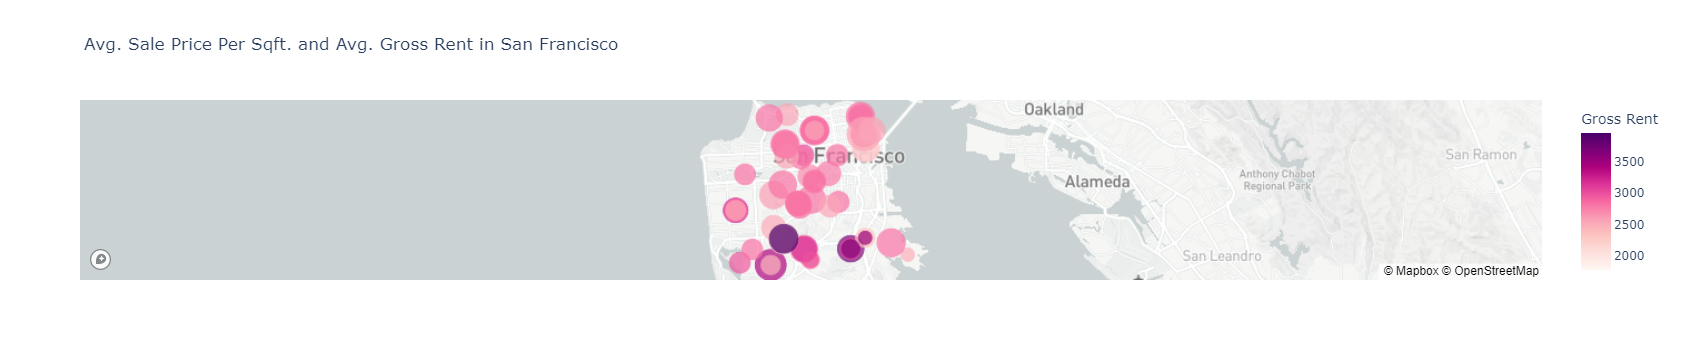

In [31]:
# Create a scatter mapbox to analyze neighborhood info


# Below wcreates a scatter plot with the longitudes and latitudes
neighborhoods_scatter_plot = px.scatter_mapbox(
    all_neighborhoods_df,
    title = "Avg. Sale Price Per Sqft. and Avg. Gross Rent in San Francisco",
    lat = "Lat",
    lon = "Lon",
    size = "Sale Price per Square Foot",
    color = "Gross Rent",
    zoom = 11,
    hover_name = "Neighborhood",
    size_max = 25,
    color_continuous_scale = px.colors.sequential.RdPu
)

# This will show the result of the plot above.
neighborhoods_scatter_plot


### Step 7: Use the interactive map to answer the following question:

In [32]:
all_neighborhoods_df_gross_rent = all_neighborhoods_df.sort_values(by=['Gross Rent'], ascending=False)
all_neighborhoods_df_gross_rent.head()

Neighborhood       Lat        Lon    Year  \
67      Westwood Park  37.73415 -122.45700  2015.0   
3     Bayview Heights  37.72874 -122.41098  2015.0   
63  Visitacion Valley  37.72874 -122.41098  2014.5   
55     Silver Terrace  37.73467 -122.40106  2014.0   
33     Merced Heights  37.71993 -122.46595  2014.0   

    Sale Price per Square Foot  Housing Units  Gross Rent  
67                  687.087575       382295.0      3959.0  
3                   590.792839       382295.0      3739.0  
63                  301.466180       381321.5      3657.0  
55                  170.292549       380348.0      3528.0  
33                  788.844818       380348.0      3414.0

In [33]:
all_neighborhoods_df_gross_rent = all_neighborhoods_df.sort_values(by=['Sale Price per Square Foot'], ascending=False)
all_neighborhoods_df_gross_rent.head()

Neighborhood       Lat        Lon     Year  \
61  Union Square District  37.79101 -122.40210  2012.50   
33         Merced Heights  37.71993 -122.46595  2014.00   
35          Miraloma Park  37.73415 -122.45700  2011.75   
47        Pacific Heights  37.79298 -122.43579  2013.00   
67          Westwood Park  37.73415 -122.45700  2015.00   

    Sale Price per Square Foot  Housing Units   Gross Rent  
61                  903.993258      377427.50  2555.166667  
33                  788.844818      380348.00  3414.000000  
35                  779.810842      375967.25  2155.250000  
47                  689.555817      378401.00  2817.285714  
67                  687.087575      382295.00  3959.000000

**Question** Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?

Westwood Park had the highest gross rent of an average of $3,959 in 2015 and Union Square District had the highest sale price per square foot at $903.99 in 2012.

## Compose Your Data Story

Based on the visualizations that you have created, compose a data story that synthesizes your analysis by answering the following questions:

**Question**  How does the trend in rental income growth compare to the trend in sales prices? Does this same trend hold true for all the neighborhoods across San Francisco?

**Answer** The overall rental income growth from 2010 - 2016 has increased by 254% while the Sale Price per Square Foot increaed 89%. Also 2015 is the only year that the average Sale Price per Square Foot (13.7%) outpaced the increase of Gross Rent (6%) Overall the rental income growth is outpacing the increase in sale price per square foot thus increasing the ROI to purchase and rent.

No this is not true for all neighborhoods, such as the Union Square District. The ROI gap is smaller and appears to be trending an even smaller ROI compared to the average SFO neighboorhoods. Please see comparison of the two plots below



In [220]:
# Plotting the Union Square District neighborhood to show that the gross rent versus sale price per square foot trend is different.
display(sfo_data_df[sfo_data_df["Neighborhood"]=="Union Square District"].groupby(["Year", "Neighborhood", "Housing Units"]).mean().hvplot(
    title= "Union Square District (2010-2016) Avg. Sale Price per Square Foot vs Avg. Gross Rent", ylabel = "Amount in USD"))

:NdOverlay   [Variable]
   :Curve   [Year]   (value)

In [212]:
display(prices_square_foot_by_year_plot)

:NdOverlay   [Legend:]
   :Curve   [Year]   (value)

In [ ]:
**Question** What insights can you share with your company about the potential one-click, buy-and-rent strategy that they're pursuing? Do neighborhoods exist that you would suggest for investment, and why?

**Answer** By looking at the YOY price increase in both the Avg. Gross Rent and the Avg. Sale Price per Square Foot for to predict
the best ROI would be to identify which Neighborhood has the fast rent % increase YOY with the smallest Sale Price per Square Foot
increase.This can be identified by calculating the YOY returns then subtract the Sale Price per Square Foot from the Gross Rent 
to identify the potential longer term greater ROI neighborhood. While there are multiple data points missing that could change
the final descion based on the data points we do have i would recommend looking into  for an investment because the Gross rent
in these neighborhoods is growing at a good percentage and outpacing the Sale Price per Square Foot. This assists in 
identifying the neighboorhoods where rent increase % is the greatest and where the neighborhoods have the lowest & increase in the Sale Price per Sqaure Foot

Recommendations for further evaluation based on which neighborhoods Gross Rent % outpaced the increase % of the Sale Price per Square Foot : 
    
Hayes Valley
Inner Richmond

Recommendations for further evaluation based on the fastest rebound or growth % between the Gross rent and Sale Price per Square Foot from 2015-2016:

Anza Vista 
Hayes Valley 



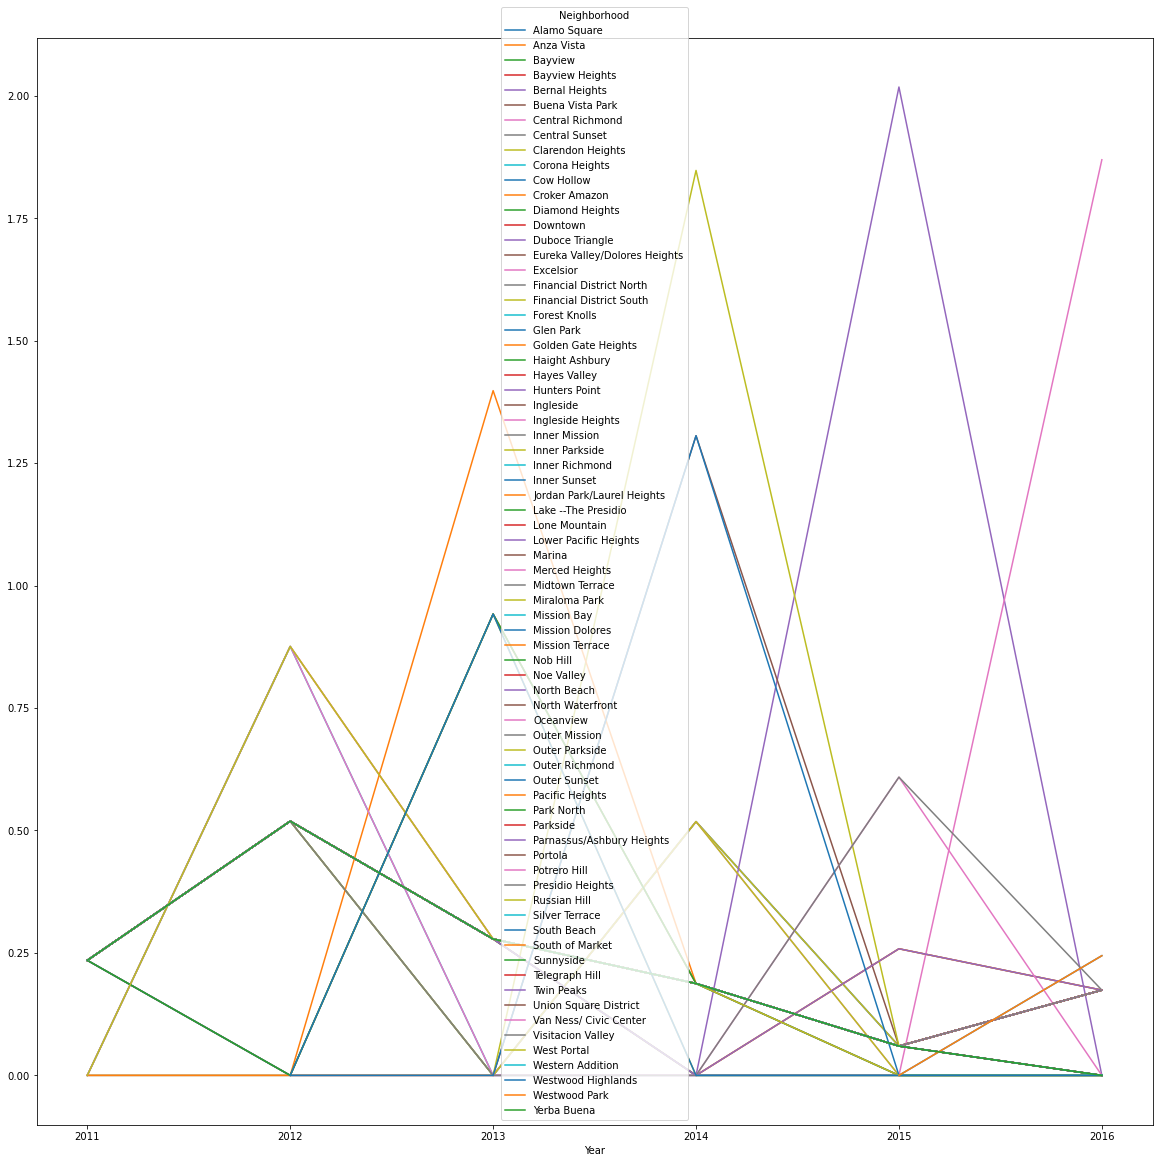

In [237]:
avg_gross_rent_overlay_by_neighborhood = rent_by_year_by_neighborhood.plot(figsize = (20,20))


In [136]:
sales_price_by_year_by_neighborhood = sfo_data_df.groupby(["Neighborhood","Year"]).mean()
sales_price_by_year_by_neighborhood = sales_price_by_year_by_neighborhood[["Sale Price per Square Foot"]]
sales_price_by_year_by_neighborhood

sales_price_by_year_by_neighborhood = sales_price_by_year_by_neighborhood.reset_index()
sales_price_by_year_by_neighborhood.columns
sales_price_by_year_by_neighborhood.dtypes
sales_price_by_year_by_neighborhood = sales_price_by_year_by_neighborhood.pivot(index = "Year", columns = "Neighborhood", values = "Sale Price per Square Foot")
sales_price_by_year_by_neighborhood



Neighborhood  Alamo Square  Anza Vista     Bayview  Bayview Heights  \
Year                                                                  
2010            291.182945  267.932583  170.098665              NaN   
2011            272.527310         NaN  172.540562              NaN   
2012            183.099317  344.490914  165.798062              NaN   
2013            387.794144  453.340498  259.547163              NaN   
2014            484.443552  620.441407  254.958662              NaN   
2015            602.115877  465.686275         NaN       590.792839   
2016            340.981835   88.401511         NaN              NaN   

Neighborhood  Bernal Heights   Buena Vista Park  Central Richmond  \
Year                                                                
2010                      NaN        347.394919        319.027623   
2011               471.921732        171.772347        261.663800   
2012               368.266561        338.601164        279.030140   
2013               630.897303        455.218089        343.054261   
2014               544.546929               NaN        423.952727   
2015               458.004299        551.695622        473.163815   
2016               986.842105        851.401405        661.064426   

Neighborhood  Central Sunset  Clarendon Heights  Corona Heights  ...  \
Year                                                             ...   
2010              418.172493                NaN      369.359338  ...   
2011              391.426450         520.718168      222.567848  ...   
2012              334.487873                NaN      356.794814  ...   
2013              330.736431         453.771605             NaN  ...   
2014              456.241996                NaN      888.182144  ...   
2015              453.379377                NaN     1100.791194  ...   
2016              581.370875                NaN             NaN  ...   

Neighborhood  Telegraph Hill  Twin Peaks  Union Square District  \
Year                                                              
2010              524.793509  331.555996             569.193448   
2011              483.405773  284.566966             302.123253   
2012              465.802122  304.899648             445.196788   
2013              653.311617  414.435693            1290.472107   
2014              708.193032  562.911234             558.271119   
2015              996.990220  417.335379            2258.702832   
2016              903.049771  970.085470                    NaN   

Neighborhood  Van Ness/ Civic Center  Visitacion Valley  West Portal  \
Year                                                                   
2010                      108.012927                NaN   392.300764   
2011                      384.236802                NaN          NaN   
2012                      345.958040                NaN   325.795415   
2013                      285.009506         293.298372   588.074797   
2014                      475.393187         282.025468   687.782963   
2015                      677.838232         302.221873          NaN   
2016                      552.602567         328.319007          NaN   

Neighborhood  Western Addition  Westwood Highlands  Westwood Park  Yerba Buena  
Year                                                                            
2010                215.569134                 NaN            NaN   333.126774  
2011                227.418981          320.074333            NaN   438.860545  
2012                274.338460                 NaN            NaN   491.814003  
2013                217.089069          747.333538            NaN   753.011413  
2014                429.488317                 NaN     742.979723   479.923749  
2015                481.469244                 NaN            NaN   963.522606  
2016                       NaN                 NaN     631.195426          NaN  

[7 rows x 73 columns]

In [139]:
sales_price_by_year_by_neighborhood_pct = sales_price_by_year_by_neighborhood.pct_change()
sales_price_by_year_by_neighborhood_pct

Neighborhood  Alamo Square  Anza Vista   Bayview  Bayview Heights  \
Year                                                                
2010                   NaN         NaN       NaN              NaN   
2011             -0.064068    0.000000  0.014356              NaN   
2012             -0.328143    0.285737 -0.039078              NaN   
2013              1.117944    0.315972  0.565441              NaN   
2014              0.249229    0.368599 -0.017679              NaN   
2015              0.242902   -0.249427  0.000000              NaN   
2016             -0.433694   -0.810169  0.000000              0.0   

Neighborhood  Bernal Heights   Buena Vista Park  Central Richmond  \
Year                                                                
2010                      NaN               NaN               NaN   
2011                      NaN         -0.505542         -0.179808   
2012                -0.219645          0.971220          0.066369   
2013                 0.713154          0.344408          0.229452   
2014                -0.136869          0.000000          0.235818   
2015                -0.158926          0.211937          0.116077   
2016                 1.154657          0.543245          0.397115   

Neighborhood  Central Sunset  Clarendon Heights  Corona Heights  ...  \
Year                                                             ...   
2010                     NaN                NaN             NaN  ...   
2011               -0.063959                NaN       -0.397422  ...   
2012               -0.145464           0.000000        0.603083  ...   
2013               -0.011215          -0.128566        0.000000  ...   
2014                0.379473           0.000000        1.489336  ...   
2015               -0.006274           0.000000        0.239376  ...   
2016                0.282306           0.000000        0.000000  ...   

Neighborhood  Telegraph Hill  Twin Peaks  Union Square District  \
Year                                                              
2010                     NaN         NaN                    NaN   
2011               -0.078865   -0.141723              -0.469208   
2012               -0.036416    0.071451               0.473560   
2013                0.402552    0.359253               1.898655   
2014                0.084005    0.358260              -0.567390   
2015                0.407794   -0.258612               3.045889   
2016               -0.094224    1.324475               0.000000   

Neighborhood  Van Ness/ Civic Center  Visitacion Valley  West Portal  \
Year                                                                   
2010                             NaN                NaN          NaN   
2011                        2.557322                NaN     0.000000   
2012                       -0.099623                NaN    -0.169526   
2013                       -0.176173                NaN     0.805043   
2014                        0.667991          -0.038435     0.169550   
2015                        0.425848           0.071612     0.000000   
2016                       -0.184757           0.086351     0.000000   

Neighborhood  Western Addition  Westwood Highlands  Westwood Park  Yerba Buena  
Year                                                                            
2010                       NaN                 NaN            NaN          NaN  
2011                  0.054970                 NaN            NaN     0.317398  
2012                  0.206313            0.000000            NaN     0.120661  
2013                 -0.208682            1.334875            NaN     0.531090  
2014                  0.978397            0.000000            NaN    -0.362661  
2015                  0.121030            0.000000       0.000000     1.007658  
2016                  0.000000            0.000000      -0.150454     0.000000  

[7 rows x 73 columns]

In [140]:
rent_by_year_by_neighborhood = sfo_data_df.groupby(["Neighborhood","Year"]).mean()
rent_by_year_by_neighborhood = rent_by_year_by_neighborhood [["Gross Rent"]]


rent_by_year_by_neighborhood = rent_by_year_by_neighborhood.reset_index()
rent_by_year_by_neighborhood.columns
rent_by_year_by_neighborhood.dtypes
rent_by_year_by_neighborhood = rent_by_year_by_neighborhood.pivot(index = "Year", columns = "Neighborhood", values = "Gross Rent")
rent_by_year_by_neighborhood

Neighborhood  Alamo Square  Anza Vista  Bayview  Bayview Heights  \
Year                                                               
2010                1239.0      1239.0   1239.0              NaN   
2011                1530.0         NaN   1530.0              NaN   
2012                2324.0      2324.0   2324.0              NaN   
2013                2971.0      2971.0   2971.0              NaN   
2014                3528.0      3528.0   3528.0              NaN   
2015                3739.0      3739.0      NaN           3739.0   
2016                4390.0      4390.0      NaN              NaN   

Neighborhood  Bernal Heights   Buena Vista Park  Central Richmond  \
Year                                                                
2010                      NaN            1239.0            1239.0   
2011                   1530.0            1530.0            1530.0   
2012                   2324.0            2324.0            2324.0   
2013                   2971.0            2971.0            2971.0   
2014                   3528.0               NaN            3528.0   
2015                   3739.0            3739.0            3739.0   
2016                   4390.0            4390.0            4390.0   

Neighborhood  Central Sunset  Clarendon Heights  Corona Heights  ...  \
Year                                                             ...   
2010                  1239.0                NaN          1239.0  ...   
2011                  1530.0             1530.0          1530.0  ...   
2012                  2324.0                NaN          2324.0  ...   
2013                  2971.0             2971.0             NaN  ...   
2014                  3528.0                NaN          3528.0  ...   
2015                  3739.0                NaN          3739.0  ...   
2016                  4390.0                NaN             NaN  ...   

Neighborhood  Telegraph Hill  Twin Peaks  Union Square District  \
Year                                                              
2010                  1239.0      1239.0                 1239.0   
2011                  1530.0      1530.0                 1530.0   
2012                  2324.0      2324.0                 2324.0   
2013                  2971.0      2971.0                 2971.0   
2014                  3528.0      3528.0                 3528.0   
2015                  3739.0      3739.0                 3739.0   
2016                  4390.0      4390.0                    NaN   

Neighborhood  Van Ness/ Civic Center  Visitacion Valley  West Portal  \
Year                                                                   
2010                          1239.0                NaN       1239.0   
2011                          1530.0                NaN          NaN   
2012                          2324.0                NaN       2324.0   
2013                          2971.0             2971.0       2971.0   
2014                          3528.0             3528.0       3528.0   
2015                          3739.0             3739.0          NaN   
2016                          4390.0             4390.0          NaN   

Neighborhood  Western Addition  Westwood Highlands  Westwood Park  Yerba Buena  
Year                                                                            
2010                    1239.0                 NaN            NaN       1239.0  
2011                    1530.0              1530.0            NaN       1530.0  
2012                    2324.0                 NaN            NaN       2324.0  
2013                    2971.0              2971.0            NaN       2971.0  
2014                    3528.0                 NaN         3528.0       3528.0  
2015                    3739.0                 NaN            NaN       3739.0  
2016                       NaN                 NaN         4390.0          NaN  

[7 rows x 73 columns]

In [158]:
rent_by_year_by_neighborhood_pct = rent_by_year_by_neighborhood.pct_change()
rent_by_year_by_neighborhood_pct

Neighborhood  Alamo Square  Anza Vista   Bayview  Bayview Heights  \
Year                                                                
2010                   NaN         NaN       NaN              NaN   
2011                   NaN         NaN       NaN              NaN   
2012              1.209568         inf  1.209568              NaN   
2013             -0.463538   -0.682086 -0.463538              NaN   
2014             -0.326583   -0.326583 -0.326583              NaN   
2015             -0.680992   -0.680992 -1.000000              NaN   
2016              1.911197    1.911197       NaN              NaN   

Neighborhood  Bernal Heights   Buena Vista Park  Central Richmond  \
Year                                                                
2010                      NaN               NaN               NaN   
2011                      NaN               NaN               NaN   
2012                      NaN          1.209568          1.209568   
2013                -0.463538         -0.463538         -0.463538   
2014                -0.326583         -1.000000         -0.326583   
2015                -0.680992               inf         -0.680992   
2016                 1.911197         -0.326454          1.911197   

Neighborhood  Central Sunset  Clarendon Heights  Corona Heights  ...  \
Year                                                             ...   
2010                     NaN                NaN             NaN  ...   
2011                     NaN                NaN             NaN  ...   
2012                1.209568                NaN        1.209568  ...   
2013               -0.463538                inf       -1.000000  ...   
2014               -0.326583               -1.0             inf  ...   
2015               -0.680992                NaN       -0.884558  ...   
2016                1.911197                NaN       -1.000000  ...   

Neighborhood  Telegraph Hill  Twin Peaks  Union Square District  \
Year                                                              
2010                     NaN         NaN                    NaN   
2011                     NaN         NaN                    NaN   
2012                1.209568    1.209568               1.209568   
2013               -0.463538   -0.463538              -0.463538   
2014               -0.326583   -0.326583              -0.326583   
2015               -0.680992   -0.680992              -0.680992   
2016                1.911197    1.911197              -1.000000   

Neighborhood  Van Ness/ Civic Center  Visitacion Valley  West Portal  \
Year                                                                   
2010                             NaN                NaN          NaN   
2011                             NaN                NaN          NaN   
2012                        1.209568                NaN          inf   
2013                       -0.463538                NaN    -0.682086   
2014                       -0.326583                NaN    -0.326583   
2015                       -0.680992          -0.680992    -1.000000   
2016                        1.911197           1.911197          NaN   

Neighborhood  Western Addition  Westwood Highlands  Westwood Park  Yerba Buena  
Year                                                                            
2010                       NaN                 NaN            NaN          NaN  
2011                       NaN                 NaN            NaN          NaN  
2012                  1.209568                 NaN            NaN     1.209568  
2013                 -0.463538                 inf            NaN    -0.463538  
2014                 -0.326583                -1.0            NaN    -0.326583  
2015                 -0.680992                 NaN            NaN    -0.680992  
2016                 -1.000000                 NaN            inf    -1.000000  

[7 rows x 73 columns]

In [159]:
pct_rent_sqft = rent_by_year_by_neighborhood_pct - sales_price_by_year_by_neighborhood_pct
pct_rent_sqft

Neighborhood  Alamo Square  Anza Vista   Bayview  Bayview Heights  \
Year                                                                
2010                   NaN         NaN       NaN              NaN   
2011                   NaN         NaN       NaN              NaN   
2012              1.537711         inf  1.248646              NaN   
2013             -1.581482   -0.998058 -1.028979              NaN   
2014             -0.575811   -0.695182 -0.308904              NaN   
2015             -0.923894   -0.431565 -1.000000              NaN   
2016              2.344891    2.721367       NaN              NaN   

Neighborhood  Bernal Heights   Buena Vista Park  Central Richmond  \
Year                                                                
2010                      NaN               NaN               NaN   
2011                      NaN               NaN               NaN   
2012                      NaN          0.238348          1.143199   
2013                -1.176692         -0.807946         -0.692990   
2014                -0.189713         -1.000000         -0.562401   
2015                -0.522066               inf         -0.797069   
2016                 0.756540         -0.869699          1.514082   

Neighborhood  Central Sunset  Clarendon Heights  Corona Heights  ...  \
Year                                                             ...   
2010                     NaN                NaN             NaN  ...   
2011                     NaN                NaN             NaN  ...   
2012                1.355032                NaN        0.606485  ...   
2013               -0.452322                inf       -1.000000  ...   
2014               -0.706056               -1.0             inf  ...   
2015               -0.674718                NaN       -1.123934  ...   
2016                1.628892                NaN       -1.000000  ...   

Neighborhood  Telegraph Hill  Twin Peaks  Union Square District  \
Year                                                              
2010                     NaN         NaN                    NaN   
2011                     NaN         NaN                    NaN   
2012                1.245984    1.138117               0.736008   
2013               -0.866090   -0.822791              -2.362193   
2014               -0.410587   -0.684842               0.240807   
2015               -1.088787   -0.422380              -3.726881   
2016                2.005421    0.586723              -1.000000   

Neighborhood  Van Ness/ Civic Center  Visitacion Valley  West Portal  \
Year                                                                   
2010                             NaN                NaN          NaN   
2011                             NaN                NaN          NaN   
2012                        1.309191                NaN          inf   
2013                       -0.287365                NaN    -1.487129   
2014                       -0.994573                NaN    -0.496133   
2015                       -1.106840          -0.752604    -1.000000   
2016                        2.095955           1.824846          NaN   

Neighborhood  Western Addition  Westwood Highlands  Westwood Park  Yerba Buena  
Year                                                                            
2010                       NaN                 NaN            NaN          NaN  
2011                       NaN                 NaN            NaN          NaN  
2012                  1.003255                 NaN            NaN     1.088907  
2013                 -0.254856                 inf            NaN    -0.994628  
2014                 -1.304979                -1.0            NaN     0.036078  
2015                 -0.802022                 NaN            NaN    -1.688650  
2016                 -1.000000                 NaN            inf    -1.000000  

[7 rows x 73 columns]

In [225]:
pct_rent_sqft_sum = pct_rent_sqft.sum()
best_roi= pct_rent_sqft_sum.sort_values(ascending=False)
display(best_roi.head(50))

Neighborhood
Merced Heights                        inf
Excelsior                             inf
Miraloma Park                         inf
North Beach                           inf
Anza Vista                            inf
Oceanview                             inf
Outer Mission                         inf
Inner Parkside                        inf
Ingleside Heights                     inf
Ingleside                             inf
Hunters Point                         inf
Golden Gate Heights                   inf
Mission Terrace                       inf
Forest Knolls                         inf
Financial District South              inf
Glen Park                             inf
South Beach                           inf
Corona Heights                        inf
Westwood Park                         inf
Westwood Highlands                    inf
West Portal                           inf
Buena Vista Park                      inf
Clarendon Heights                     inf
Mission Bay          

In [228]:
pct_rent_sqft_trans = pct_rent_sqft.T
pct_rent_sqft_trans = pct_rent_sqft_trans.sort_values(by=[2016] , ascending=False)
display(pct_rent_sqft_trans.head(50))


Year                           2010  2011      2012      2013      2014  \
Neighborhood                                                              
Westwood Park                   NaN   NaN       NaN       NaN       NaN   
Mission Bay                     NaN   NaN  0.849433 -0.463538  0.354195   
Merced Heights                  NaN   NaN       NaN       NaN       inf   
Ingleside Heights               NaN   NaN       NaN       NaN       NaN   
Anza Vista                      NaN   NaN       inf -0.998058 -0.695182   
Hayes Valley                    NaN   NaN  1.118209 -1.068057 -0.199107   
Park North                      NaN   NaN  1.214841 -1.243020 -0.052103   
Marina                          NaN   NaN  1.070382 -0.935182 -0.307719   
Alamo Square                    NaN   NaN  1.537711 -1.581482 -0.575811   
Inner Parkside                  NaN   NaN       NaN       NaN       inf   
Inner Sunset                    NaN   NaN  1.132820 -0.800269 -0.407648   
South of Market                 NaN   NaN  0.837001 -0.370854 -1.987656   
Lower Pacific Heights           NaN   NaN  0.904417 -0.846896 -0.633728   
Van Ness/ Civic Center          NaN   NaN  1.309191 -0.287365 -0.994573   
Inner Richmond                  NaN   NaN  1.172268 -0.274767 -0.748979   
Potrero Hill                    NaN   NaN  1.282094 -0.746528 -1.072354   
Telegraph Hill                  NaN   NaN  1.245984 -0.866090 -0.410587   
Haight Ashbury                  NaN   NaN  1.142086 -0.605995 -0.364316   
Financial District North        NaN   NaN  1.191655 -0.422001 -0.820232   
Visitacion Valley               NaN   NaN       NaN       NaN       NaN   
Pacific Heights                 NaN   NaN  1.057911 -0.323114 -0.963137   
Outer Parkside                  NaN   NaN  0.916575 -0.653440 -1.075347   
Jordan Park/Laurel Heights      NaN   NaN  1.582241 -0.987936 -0.057289   
Central Sunset                  NaN   NaN  1.355032 -0.452322 -0.706056   
Excelsior                       NaN   NaN       inf -0.463019 -0.563185   
Russian Hill                    NaN   NaN  1.285758 -0.685829 -0.737454   
Eureka Valley/Dolores Heights   NaN   NaN  0.939334 -0.623369 -0.524193   
Central Richmond                NaN   NaN  1.143199 -0.692990 -0.562401   
Outer Sunset                    NaN   NaN  0.819947 -0.243287 -0.849062   
Nob Hill                        NaN   NaN  1.306031 -0.977677 -0.353227   
Noe Valley                      NaN   NaN  1.065059 -0.900530 -0.391190   
Downtown                        NaN   NaN  1.060910 -0.806689 -0.512697   
Inner Mission                   NaN   NaN  1.020106 -0.584348 -0.556129   
Mission Terrace                 NaN   NaN       NaN       inf -0.373471   
Glen Park                       NaN   NaN -1.000000       inf -1.007694   
Sunnyside                       NaN   NaN -1.000000       inf -0.776469   
Cow Hollow                      NaN   NaN  0.558709 -0.560595 -0.304619   
Parnassus/Ashbury Heights       NaN   NaN  1.103907 -0.288552 -1.143616   
Bernal Heights                  NaN   NaN       NaN -1.176692 -0.189713   
Twin Peaks                      NaN   NaN  1.138117 -0.822791 -0.684842   
Presidio Heights                NaN   NaN  1.345664 -0.665671 -0.503267   
Outer Mission                   NaN   NaN       NaN -1.000000       NaN   
Outer Richmond                  NaN   NaN  0.960415 -0.445155 -0.535745   
North Beach                     NaN   NaN       NaN -0.224825 -1.000000   
Buena Vista Park                NaN   NaN  0.238348 -0.807946 -1.000000   
Golden Gate Heights             NaN   NaN -1.000000       inf -0.394279   
Corona Heights                  NaN   NaN  0.606485 -1.000000       inf   
Financial District South        NaN   NaN  0.478802 -1.000000       inf   
Western Addition                NaN   NaN  1.003255 -0.254856 -1.304979   
Union Square District           NaN   NaN  0.736008 -2.362193  0.240807   

Year                               2015      2016  
Neighborhood                                   